# Feature Engineering 1: From variables to features

## Imports and connection

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
sns.set(style="whitegrid")

warnings.filterwarnings('ignore')

C:\Users\sebar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()

## Understanding the Data

In [3]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

## 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

In [4]:
for var in ['math score', 'reading score', 'writing score']:
    if student_df.loc[student_df[var] == 0, var].count() == 0:
        print('All values in the {} column are positive'.format(var))
    else:
        print('One or more values in the {} column are non-positive'.format(var))

student_df['math score'].value_counts()[0]

One or more values in the math score column are non-positive
All values in the reading score column are positive
All values in the writing score column are positive


1

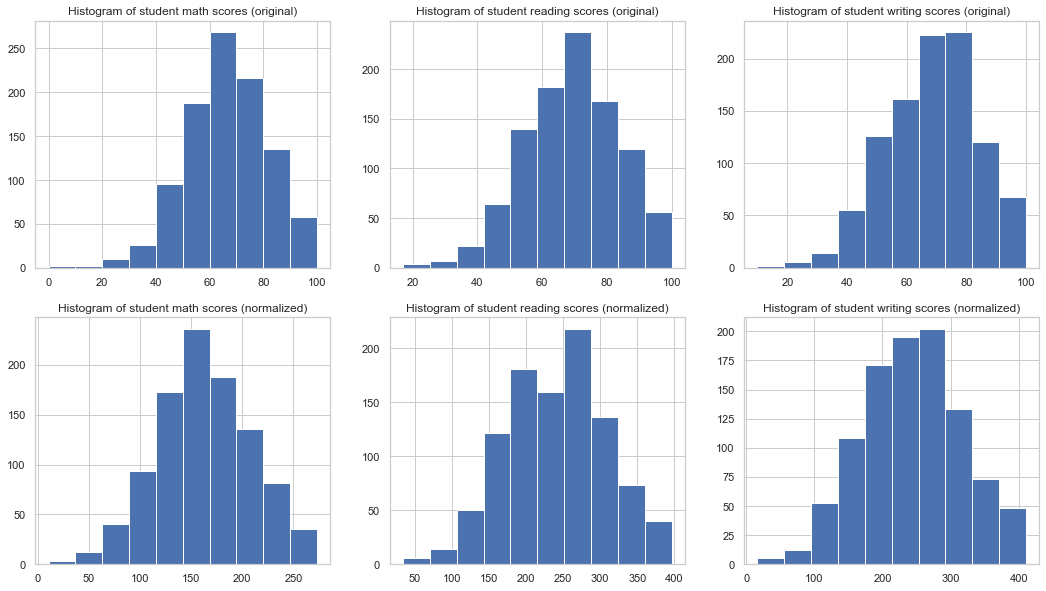

In [5]:
from scipy.stats import boxcox

math_boxcox,_ = boxcox(student_df.loc[student_df['math score'] > 0]['math score']) # What is the purpose of the second bracketed 'math score'?
reading_boxcox,_ = boxcox(student_df['reading score'])
writing_boxcox,_ = boxcox(student_df['writing score'])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(student_df['math score'])
plt.title('Histogram of student math scores (original)')

plt.subplot(2, 3, 2)
plt.hist(student_df['reading score'])
plt.title('Histogram of student reading scores (original)')

plt.subplot(2, 3, 3)
plt.hist(student_df['writing score'])
plt.title('Histogram of student writing scores (original)')

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title('Histogram of student math scores (normalized)')

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title('Histogram of student reading scores (normalized)')

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title('Histogram of student writing scores (normalized)')

plt.show()

In [6]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [7]:
jb_stats = jarque_bera(student_df["math score"])
norm_stats = normaltest(student_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["reading score"])
norm_stats = normaltest(student_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df["writing score"])
norm_stats = normaltest(student_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


P-values confirm statistically significant differences in distributions as compared to normal distribution

In [8]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


Box-Cox transformation brings distributions closer to a normal distribution as evidenced by the test statistics. The differences in distribution are no longer statistically significant.

## 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

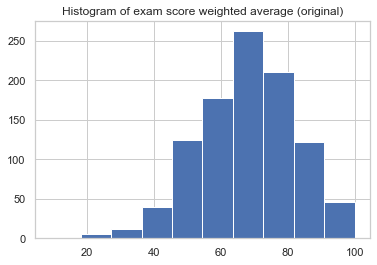

The Jarque-Bera test statistic is 15.453387913085168 and its p-value is 0.00044089934264401887
The Normal test statistic is 15.186721327231322 and its p-value is 0.0005037851534494478


In [11]:
exam_score = (student_df['math score'] + student_df['reading score'] + student_df['writing score'])/3

plt.hist(exam_score)
plt.title('Histogram of exam score weighted average (original)')
plt.show()

jb_test = jarque_bera(exam_score)
norm_test = normaltest(exam_score)

print('The Jarque-Bera test statistic is {0} and its p-value is {1}'.format(jb_test[0], jb_test[1]))
print('The Normal test statistic is {0} and its p-value is {1}'.format(norm_test[0], norm_test[1]))

Although the histogram looks normally distributed, the jb and normal test indicates this is not the case.

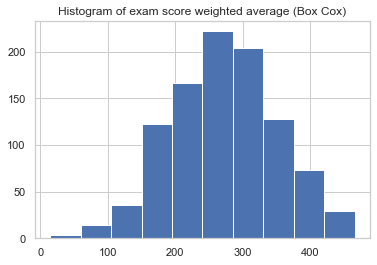

The Jarque-Bera test statistic is 2.4353987431906026 and its p-value is 0.29591016374203183
The Normal test statistic is 2.779857245981238 and its p-value is 0.2490930835165177


In [12]:
exam_score_boxcox,_ = boxcox((student_df['math score'] + student_df['reading score'] + student_df['writing score'])/3)

plt.hist(exam_score_boxcox)
plt.title('Histogram of exam score weighted average (Box Cox)')
plt.show()

jb_test = jarque_bera(exam_score_boxcox)
norm_test = normaltest(exam_score_boxcox)

print('The Jarque-Bera test statistic is {0} and its p-value is {1}'.format(jb_test[0], jb_test[1]))
print('The Normal test statistic is {0} and its p-value is {1}'.format(norm_test[0], norm_test[1]))

The transformed variable is now normally distributed.

## 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

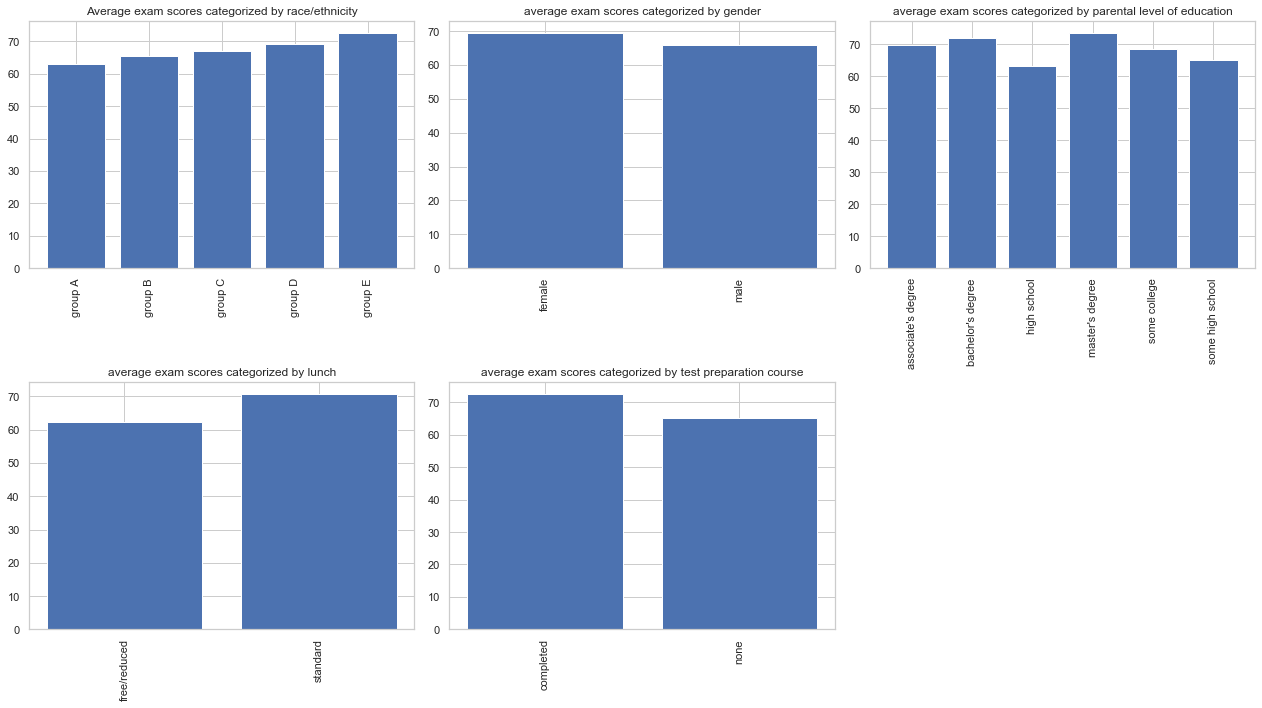

In [25]:
student_df['exam_score'] = exam_score

plt.figure(figsize=(18,10))

# Why get a mean of the index axis?

plt.subplot(2, 3, 1)
plt.bar(student_df.groupby('race/ethnicity')['exam_score'].mean().index,
       student_df.groupby('race/ethnicity')['exam_score'].mean())

plt.title('Average exam scores categorized by race/ethnicity')
plt.xticks(rotation='vertical')

plt.subplot(2, 3, 2)
plt.bar(student_df.groupby('gender')['exam_score'].mean().index,
       student_df.groupby('gender')['exam_score'].mean())
plt.title("average exam scores categorized by gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(student_df.groupby("parental level of education")
        ["exam_score"].mean().index, student_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores categorized by parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(student_df.groupby("lunch")
        ["exam_score"].mean().index, student_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores categorized by lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(student_df.groupby("test preparation course")
        ["exam_score"].mean().index, student_df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores categorized by test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

## Conclusion

- Female scores higher than male scores.
- Group E scores highest of all race/ethnicity groups, while group E scores the lowest.
- Overall, scores increase with parental level of education, although students with parents that have completed some high school score higher than students with parents with have completed high school.
- Students with a standard lunch score higher than students with free/reduced lunches.
- Students that have completed test prep courses score higher than those who have not.

All variables seem related to the exam_score variable in some way, suggesting they may all be useful in explaining the determinants of success in exams.